# Imports

In [3]:
#from IBMTools import( 
#        simul,
#        savefig,
#        saveMultipleHist,
#        printDict,
#        plotMultipleQiskit,
#        plotMultipleQiskitGrover)
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from qiskit import( ClassicalRegister,
        QuantumRegister,
        QuantumCircuit,
        execute,
        Aer,
        transpile
        )
from qiskit.visualization import( plot_histogram,
        plot_state_city)
mpl.rcParams['figure.figsize'] = 11,8
mpl.rcParams.update({'font.size' : 15})
    

# Grover Funcs

In [4]:
def markedListGrover(markedList,N):
    oracleList = np.ones(2**N)
    for element in markedList:
        oracleList[element] = -1
    return oracleList.tolist()

def getOracle(markedList,N):
    oracleList = np.eye(2**N)
    for element in markedList:
        oracleList[element][element] = -1
    return oracleList

def oracleGrover(markedList,N):
    qreg = QuantumRegister(N)
    qc = QuantumCircuit(qreg,name='    Oracle    ')
    qc.diagonal(markedList,qreg)
    qc=transpile(qc,optimization_level=3)
    return qc

def diffusionGrover(N):
    qreg = QuantumRegister(N)
    difCirc = QuantumCircuit(qreg,name='     Diff    ')
    difCirc.h(qreg)
    aux = markedListGrover([0],N)
    qcAux = oracleGrover(aux,N)
    difCirc.append(qcAux,range(N))
    difCirc.h(qreg)
    difCirc=transpile(difCirc,optimization_level=3)
    return difCirc

def grover(N,steps,marked):
    qc = QuantumCircuit(N,N)
    qcOracle = oracleGrover(markedListGrover(marked,N),N)
    qcDiffusion = diffusionGrover(N)
    qc.h(range(N))
    qc.barrier()
    for i in range(steps):
        qc.append(qcOracle,range(N))
        qc.barrier()
        qc.append(qcDiffusion,range(N))
        qc.barrier()
    qc.measure(range(N),range(N))
    qc = transpile(qc,optimization_level=1)
    return qc

# Implementation

In [55]:
def simul(qc,stateVec,shots):
    if stateVec:
        backend = Aer.get_backend('statevector_simulator')
        result = execute(qc,backend,shots=shots).result().get_statevector(qc,decimals=3)
    else:
        backend = Aer.get_backend('qasm_simulator')
        result = execute(qc,backend,shots=shots).result().get_counts()
    return result

def decResultDict(n):
    "Retuns a dictionary composed of a range of N keys converted to binary."
    baseDict = {}
    for decNumber in range(2**n):
        dec = decNumber 
        baseDict[dec] = 0
    return baseDict

def normalizedResults(resultsDict,n,shots):
    decDict = decResultDict(n)
    correctedResults = {int(k,2) : v/shots for k,v in resultsDict.items()}
    newDict1 = correctedResults
    newDict2 = decDict
    normalizedResults = {**newDict2,**newDict1}
    return normalizedResults

## N = 3

### Marked=1

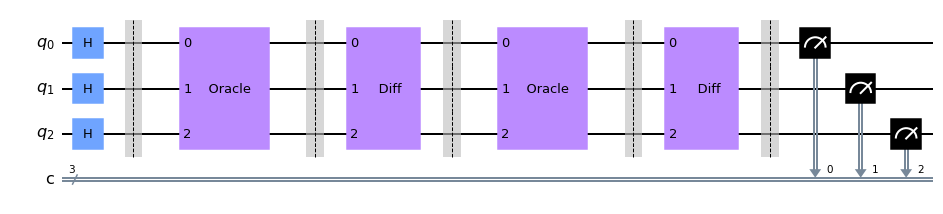

In [76]:
N3=3
markedN3M0 = [int((2**N3 -1)/2)]
stepsN3 =int((np.pi /4) * np.sqrt(2**N3/len(markedN3M0)))
groverCircN3M0 = grover(N3,stepsN3,markedN3M0)
groverCircN3.draw(output='mpl')

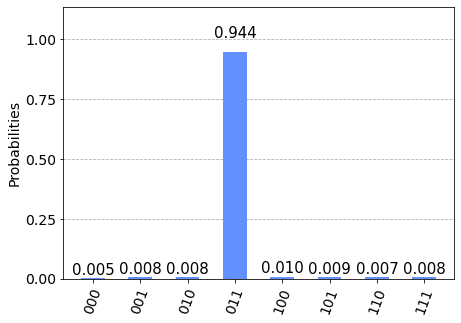

In [74]:
shots = 3000
resultsN3M0 = simul(groverCircN3M0,False,shots)
plot_histogram(resultsN3M0)

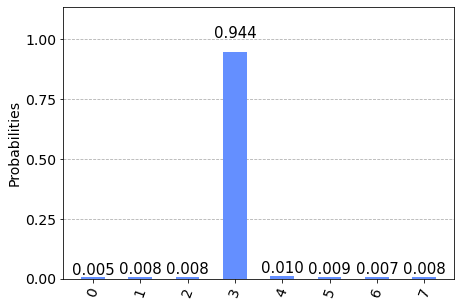

In [75]:
normResultsN3M0 = normalizedResults(resultsN3M0,N3,shots)
plot_histogram(normResultsN3M0)

### Marked=2 (SingleShot)

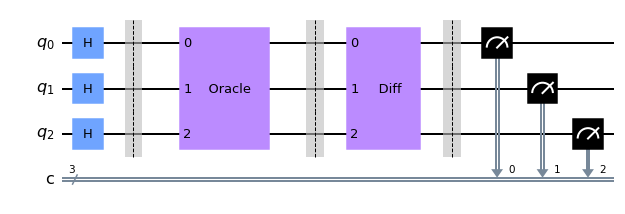

In [69]:
N3=3
markedN3M2 = [0,int((2**N -1))]
stepsN3 =int((np.pi /4) * np.sqrt(2**N3/len(markedN3M2)))
groverCircN3M2 = grover(N3,stepsN3,markedN3M2)
groverCircN3M2.draw(output='mpl')

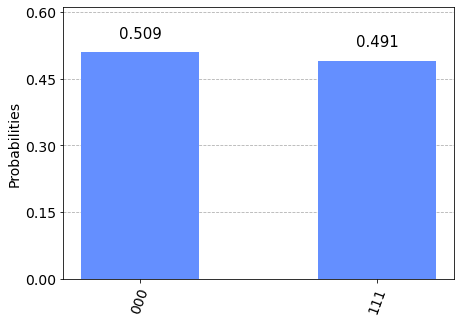

In [71]:
shots = 3000
resultsN3M2 = simul(groverCircN3M2,False,shots)
plot_histogram(resultsN3M2)

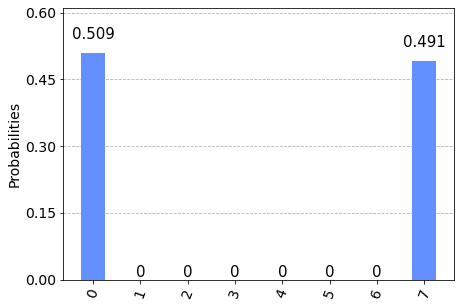

In [72]:
normResultsN3M2 = normalizedResults(resultsN3M2,N3,shots)
plot_histogram(normResultsN3M2)

## N = 4

### Marked=1

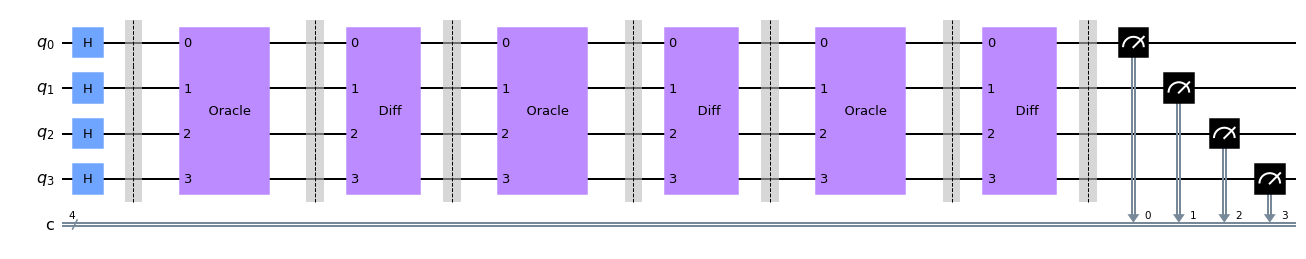

In [80]:
N4=4
markedN4M0 = [int((2**N4 -1)/2)]
stepsN4 =int((np.pi /4) * np.sqrt(2**N4/len(markedN4M0)))
groverCircN4M0 = grover(N4,stepsN4,markedN4M0)
groverCircN4M0.draw(output='mpl',fold=-1)

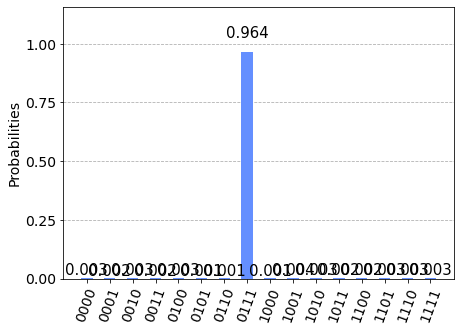

In [81]:
shots = 3000
resultsN4M0 = simul(groverCircN4M0,False,shots)
plot_histogram(resultsN4M0)

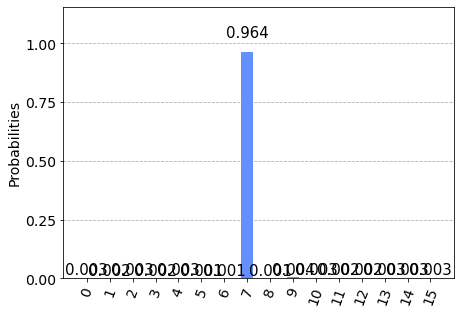

In [82]:
normResultsN4M0 = normalizedResults(resultsN4M0,N4,shots)
plot_histogram(normResultsN4M0)

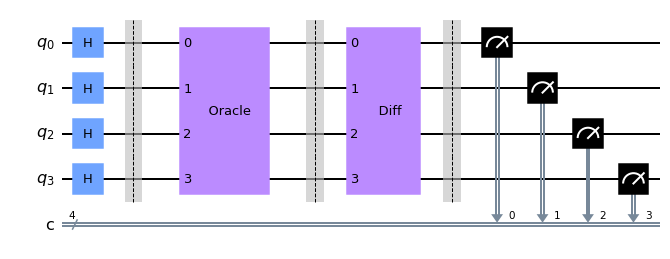

In [87]:
N4=4
markedN4M2 = [0,1,int((2**N4 -1)-1),int((2**N4 -1))]
stepsN4 =int((np.pi /4) * np.sqrt(2**N4/len(markedN4M2)))
groverCircN4M2 = grover(N4,stepsN4,markedN4M2)
groverCircN4M2.draw(output='mpl',fold=-1)

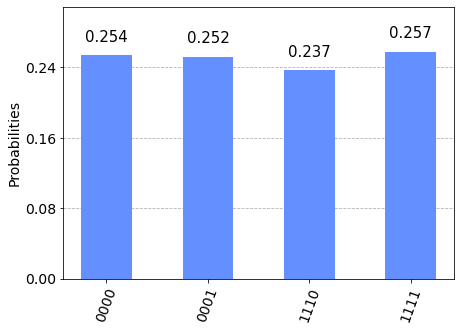

In [88]:
shots = 3000
resultsN4M2 = simul(groverCircN4M2,False,shots)
plot_histogram(resultsN4M2)

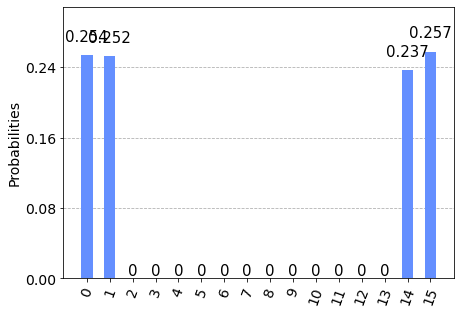

In [89]:
normResultsN4M2 = normalizedResults(resultsN4M2,N4,shots)
plot_histogram(normResultsN4M2)